# Visualize the dataset
 

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ElectricCarDataset/ElectricCarData_Norm.csv', sep=';')

In [4]:
dataset

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
dataset.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
dataset.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [ ]:
dataset.shape

(103, 14)

In [ ]:
dataset.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [ ]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [ ]:
dataset.dtypes

Brand          object
Model          object
Accel          object
TopSpeed       object
Range          object
Efficiency     object
FastCharge     object
RapidCharge    object
PowerTrain     object
PlugType       object
BodyStyle      object
Segment        object
Seats           int64
PriceEuro       int64
dtype: object

In [ ]:
Le_brand = LabelEncoder()
Le_model = LabelEncoder()
Le_rapidCharge = LabelEncoder()
Le_powerTrain = LabelEncoder()
Le_plugType = LabelEncoder()
Le_bodyStyle = LabelEncoder()
Le_segment = LabelEncoder()

In [ ]:
Le_brand.fit(dataset['Brand'].values)
Le_model.fit(dataset['Model'].values)
Le_rapidCharge.fit(dataset['RapidCharge'].values)
Le_powerTrain.fit(dataset['PowerTrain'].values)
Le_plugType.fit(dataset['PlugType'].values)
Le_bodyStyle.fit(dataset['BodyStyle'].values)
Le_segment.fit(dataset['Segment'].values)

LabelEncoder()

In [ ]:
dataset['Brand Encoded'] = Le_brand.transform(dataset['Brand'].values)
dataset['Model Encoded'] = Le_model.transform(dataset['Model'].values)
dataset['RapidCharge Encoded'] = Le_rapidCharge.transform(dataset['RapidCharge'].values)
dataset['PowerTrain Encoded'] = Le_powerTrain.transform(dataset['PowerTrain'].values)
dataset['PlugType Encoded'] = Le_plugType.transform(dataset['PlugType'].values)
dataset['BodyStyle Encoded'] = Le_bodyStyle.transform(dataset['BodyStyle'].values)
dataset['Segment Encoded'] = Le_segment.transform(dataset['Segment'].values)

In [ ]:
dataset = dataset.drop(['Brand','Model','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment'],axis=1)

In [ ]:
dataset

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,Brand Encoded,Model Encoded,RapidCharge Encoded,PowerTrain Encoded,PlugType Encoded,BodyStyle Encoded,Segment Encoded
0,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,5,55480,30,46,1,0,2,7,3
1,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,5,30000,31,33,1,2,2,1,2
2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,5,56440,23,0,1,0,2,2,3
3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,5,68040,2,101,1,2,2,6,3
4,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,4,32997,9,78,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,5,45000,20,6,1,1,2,1,2
99,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,5,96050,1,94,1,0,2,6,4
100,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,5,50000,20,8,1,0,2,1,2
101,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,5,65000,20,10,1,0,2,1,2


In [ ]:
dataset['Accel'] = dataset['Accel'].str.replace('sec','').astype(float)
dataset['TopSpeed'] = dataset['TopSpeed'].str.replace('km/h','').astype(int)
dataset['Range'] = dataset['Range'].str.replace('km','').astype(int)
dataset['Efficiency'] = dataset['Efficiency'].str.replace('Wh/km','').astype(int)
dataset['FastCharge'] = dataset['FastCharge'].str.replace('km/h','').replace('-', '0').astype(int)

In [ ]:
dataset

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,Brand Encoded,Model Encoded,RapidCharge Encoded,PowerTrain Encoded,PlugType Encoded,BodyStyle Encoded,Segment Encoded
0,4.6,233,450,161,940,5,55480,30,46,1,0,2,7,3
1,10.0,160,270,167,250,5,30000,31,33,1,2,2,1,2
2,4.7,210,400,181,620,5,56440,23,0,1,0,2,2,3
3,6.8,180,360,206,560,5,68040,2,101,1,2,2,6,3
4,9.5,145,170,168,190,4,32997,9,78,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000,20,6,1,1,2,1,2
99,4.5,210,335,258,540,5,96050,1,94,1,0,2,6,4
100,5.9,200,325,194,440,5,50000,20,8,1,0,2,1,2
101,5.1,200,375,232,450,5,65000,20,10,1,0,2,1,2


In [ ]:
X = dataset.drop(['Accel'],axis=1)
y = dataset['Accel'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
dataset

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,Brand Encoded,Model Encoded,RapidCharge Encoded,PowerTrain Encoded,PlugType Encoded,BodyStyle Encoded,Segment Encoded
0,4.6,233,450,161,940,5,55480,30,46,1,0,2,7,3
1,10.0,160,270,167,250,5,30000,31,33,1,2,2,1,2
2,4.7,210,400,181,620,5,56440,23,0,1,0,2,2,3
3,6.8,180,360,206,560,5,68040,2,101,1,2,2,6,3
4,9.5,145,170,168,190,4,32997,9,78,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,5,45000,20,6,1,1,2,1,2
99,4.5,210,335,258,540,5,96050,1,94,1,0,2,6,4
100,5.9,200,325,194,440,5,50000,20,8,1,0,2,1,2
101,5.1,200,375,232,450,5,65000,20,10,1,0,2,1,2


In [ ]:
X_train

,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro,Brand Encoded,Model Encoded,RapidCharge Encoded,PowerTrain Encoded,PlugType Encoded,BodyStyle Encoded,Segment Encoded
75,155,235,167,230,5,34400,12,85,1,1,2,6,2
3,180,360,206,560,5,68040,2,101,1,2,2,6,3
73,190,390,244,460,5,64000,3,43,1,0,2,6,4
85,150,250,168,330,4,34900,7,3,1,1,2,1,1
74,140,225,156,270,5,25500,29,64,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,210,335,258,540,5,96050,1,94,1,0,2,6,4
67,190,460,261,710,6,55000,30,14,1,0,2,4,6
64,180,450,200,430,5,54475,8,57,1,2,2,6,3
47,250,365,195,730,4,102945,24,65,1,0,2,7,5


In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train.shape

(82, 13)

In [ ]:
y_train.shape

(82,)

In [ ]:
model = Sequential()
model.add(Dense(216, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(512,kernel_initializer = 'normal', activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(512, kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(512, kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(512, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(512, kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2, input_shape=(216,)))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 216)               3024      
                                                                 
 dense_1 (Dense)             (None, 512)               111104    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 4s 566ms/step - loss: 65.7931 - mse: 65.7931 - mae: 7.5315 - val_loss: 35.7220 - val_mse: 35.7220 - val_mae: 5.5016
Epoch 2/15
2/2 [==============================] - 0s 71ms/step - loss: 40.6706 - mse: 40.6706 - mae: 5.5875 - val_loss: 27.8654 - val_mse: 27.8654 - val_mae: 3.9336
Epoch 3/15
2/2 [==============================] - 0s 68ms/step - loss: 30.5546 - mse: 30.5546 - mae: 3.8623 - val_loss: 7.3694 - val_mse: 7.3694 - val_mae: 2.2327
Epoch 4/15
2/2 [==============================] - 0s 78ms/step - loss: 9.5984 - mse: 9.5984 - mae: 2.5623 - val_loss: 8.0642 - val_mse: 8.0642 - val_mae: 2.2801
Epoch 5/15
2/2 [==============================] - 0s 79ms/step - loss: 8.1761 - mse: 8.1761 - mae: 2.5047 - val_loss: 4.0959 - val_mse: 4.0959 - val_mae: 1.7906
Epoch 6/15
2/2 [==============================] - 0s 66ms/step - loss: 5.0982 - mse: 5.0982 - mae: 1.6962 - val_loss: 3.3224 - val_mse: 3.3224 - val_mae: 1.6283
Epoch 7/15
2/2 [=======

In [ ]:
y_predicted_nn = model.predict(X_test)

1/1 [==============================] - 0s 183ms/step


In [ ]:
mse = mean_squared_error(y_test, y_predicted_nn)
mae = mean_absolute_error(y_test, y_predicted_nn)
r2 = r2_score(y_test, y_predicted_nn)

In [ ]:
print(f'MSE: {round(mse, 2)}')
print(f'MAE: {round(mae, 2)}')
print(f'r2: {round(r2, 2)}')

MSE: 4.13
MAE: 1.57
r2: 0.6


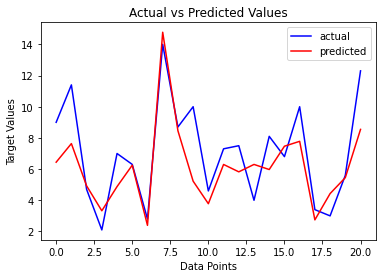

In [ ]:
# plot actual vs predicted values with different colors
plt.plot(y_test, color='blue', label='actual')
plt.plot(y_predicted_nn, color='red', label='predicted')

# add legend and axis labels
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs Predicted Values')

# display plot
plt.show()

# Huffman algorithm

## Data Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ElectricCarDataset/ElectricCarData_Norm.csv', sep=';')
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
text = df['Brand'].astype(str) +"- "+ df["Model"].astype(str)+" - "+df['RapidCharge'].astype(str)+" - "+df['PowerTrain'].astype(str)+" - "+df['BodyStyle'].astype(str) + " - "+df['PriceEuro'].astype(str)+" euro"
text = text.tolist()
print(text)

['Tesla - Model 3 Long Range Dual Motor - Rapid charging possible - All Wheel Drive - Sedan - 55480 euro', 'Volkswagen - ID.3 Pure - Rapid charging possible - Rear Wheel Drive - Hatchback - 30000 euro', 'Polestar - 2 - Rapid charging possible - All Wheel Drive - Liftback - 56440 euro', 'BMW - iX3 - Rapid charging possible - Rear Wheel Drive - SUV - 68040 euro', 'Honda - e  - Rapid charging possible - Rear Wheel Drive - Hatchback - 32997 euro', 'Lucid - Air  - Rapid charging possible - All Wheel Drive - Sedan - 105000 euro', 'Volkswagen - e-Golf  - Rapid charging possible - Front Wheel Drive - Hatchback - 31900 euro', 'Peugeot - e-208 - Rapid charging possible - Front Wheel Drive - Hatchback - 29682 euro', 'Tesla - Model 3 Standard Range Plus - Rapid charging possible - Rear Wheel Drive - Sedan - 46380 euro', 'Audi - Q4 e-tron - Rapid charging possible - All Wheel Drive - SUV - 55000 euro', 'Mercedes - EQC 400 4MATIC - Rapid charging possible - All Wheel Drive - SUV - 69484 euro', 'Niss

In [ ]:
with open('/content/drive/MyDrive/ElectricCarDataset/ElectricCar.txt', 'w') as f:
    for line in text:
        f.write(f"{line}\n")

## Huffman Compression and Decompression

In [ ]:
import heapq
import os

class HuffmanCoding:
	def __init__(self, path):
		self.path = path
		self.heap = []
		self.codes = {}
		self.reverse_mapping = {}

	class HeapNode:
		def __init__(self, char, freq):
			self.char = char
			self.freq = freq
			self.left = None
			self.right = None

		# defining comparators less_than and equals
		def __lt__(self, other):
			return self.freq < other.freq

		def __eq__(self, other):
			if(other == None):
				return False
			if(not isinstance(other, HeapNode)):
				return False
			return self.freq == other.freq

	# functions for compression:

	def make_frequency_dict(self, text):
		frequency = {}
		for character in text:
			if not character in frequency:
				frequency[character] = 0
			frequency[character] += 1
		return frequency

	def make_heap(self, frequency):
		for key in frequency:
			node = self.HeapNode(key, frequency[key])
			heapq.heappush(self.heap, node)

	def merge_nodes(self):
		while(len(self.heap)>1):
			node1 = heapq.heappop(self.heap)
			node2 = heapq.heappop(self.heap)

			merged = self.HeapNode(None, node1.freq + node2.freq)
			merged.left = node1
			merged.right = node2

			heapq.heappush(self.heap, merged)


	def make_codes_helper(self, root, current_code):
		if(root == None):
			return

		if(root.char != None):
			self.codes[root.char] = current_code
			self.reverse_mapping[current_code] = root.char
			return

		self.make_codes_helper(root.left, current_code + "0")
		self.make_codes_helper(root.right, current_code + "1")


	def make_codes(self):
		root = heapq.heappop(self.heap)
		current_code = ""
		self.make_codes_helper(root, current_code)


	def get_encoded_text(self, text):
		encoded_text = ""
		for character in text:
			encoded_text += self.codes[character]
		return encoded_text


	def pad_encoded_text(self, encoded_text):
		extra_padding = 8 - len(encoded_text) % 8
		for i in range(extra_padding):
			encoded_text += "0"

		padded_info = "{0:08b}".format(extra_padding)
		encoded_text = padded_info + encoded_text
		return encoded_text


	def get_byte_array(self, padded_encoded_text):
		if(len(padded_encoded_text) % 8 != 0):
			print("Encoded text not padded properly")
			exit(0)

		b = bytearray()
		for i in range(0, len(padded_encoded_text), 8):
			byte = padded_encoded_text[i:i+8]
			b.append(int(byte, 2))
		return b


	def compress(self):
		filename, file_extension = os.path.splitext(self.path)
		output_path = filename + ".bin"

		with open(self.path, 'r+') as file, open(output_path, 'wb') as output:
			text = file.read()
			text = text.rstrip()

			frequency = self.make_frequency_dict(text)
			self.make_heap(frequency)
			self.merge_nodes()
			self.make_codes()

			encoded_text = self.get_encoded_text(text)
			padded_encoded_text = self.pad_encoded_text(encoded_text)

			b = self.get_byte_array(padded_encoded_text)
			output.write(bytes(b))

		print("Compressed")
		return output_path


	""" functions for decompression: """


	def remove_padding(self, padded_encoded_text):
		padded_info = padded_encoded_text[:8]
		extra_padding = int(padded_info, 2)

		padded_encoded_text = padded_encoded_text[8:] 
		encoded_text = padded_encoded_text[:-1*extra_padding]

		return encoded_text

	def decode_text(self, encoded_text):
		current_code = ""
		decoded_text = ""

		for bit in encoded_text:
			current_code += bit
			if(current_code in self.reverse_mapping):
				character = self.reverse_mapping[current_code]
				decoded_text += character
				current_code = ""

		return decoded_text


	def decompress(self, input_path):
		filename, file_extension = os.path.splitext(self.path)
		output_path = filename + "_decompressed" + ".txt"

		with open(input_path, 'rb') as file, open(output_path, 'w') as output:
			bit_string = ""

			byte = file.read(1)
			while(len(byte) > 0):
				byte = ord(byte)
				bits = bin(byte)[2:].rjust(8, '0')
				bit_string += bits
				byte = file.read(1)

			encoded_text = self.remove_padding(bit_string)

			decompressed_text = self.decode_text(encoded_text)
			
			output.write(decompressed_text)

		print("Decompressed")
		return output_path

## Compressing

In [ ]:
H = HuffmanCoding('/content/drive/MyDrive/ElectricCarDataset/ElectricCar.txt')

In [ ]:
H.compress()

Compressed


'/content/drive/MyDrive/ElectricCarDataset/ElectricCar.bin'

## Rate of Compression

In [ ]:
import os
 
file_size_before = os.path.getsize('/content/drive/MyDrive/ElectricCarDataset/ElectricCar.txt')
print("File Size is :", file_size_before, "bytes")

file_size_after = os.path.getsize('/content/drive/MyDrive/ElectricCarDataset/ElectricCar.bin')
print("File Size is :", file_size_after, "bytes")

File Size is : 9260 bytes
File Size is : 5602 bytes


In [ ]:
print("Compression ratio is:",round(file_size_before/file_size_after,3))

Compression ratio is: 1.653


In [ ]:
print("Space Savings:", round((100 - ((file_size_after/file_size_before) * 100)),2), "%")

Space Savings: 39.5 %


## Decompressing

In [ ]:
H.decompress('/content/drive/MyDrive/ElectricCarDataset/ElectricCar.bin')

Decompressed


'/content/drive/MyDrive/ElectricCarDataset/ElectricCar_decompressed.txt'